# Assignment 1
### Last updated: December 20, 2021

### Name: Aseem Sachdeva

### Uniqname: aseemsa

## Instructions

Please turn in:
1. A Jupyter Notebook file. This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code. Irrelevant code and results should be deleted prior to submission.

2. An html file showing the preview of the Notebook. To create this file, select File -> Download as > HTML. 

### Before submitting, please select Kernel -> Restart & Run All.

# Assignment 1

In this assignment, we are going to practice analyzing networks using the various measurements and metrics that we have learned this week. You will work with three different network datasets. First, you will choose one of the networks and explore its features. Then you will complete a prediction task using a Facebook network.

## Dataset descriptions

Below are three data sets that you can work with. For this assignment, you only need to choose one, but you are welcome to explore the others. 

### 1. Star wars interaction graph

- `starwars-full-interactions.json`: characters in Star Wars and their interactions. Each character is treated as a node, and an edge is created if two characters ever appear in the same scene.

- `star_war_label.csv`: labels of the most prominent characters.  A character has label 1 if they frequently appear in the Star Wars movies and 0 otherwise. The order of the names and labels in this file is the same as their node number.

> Source: Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479.

### 2. Facebook friendships

- `slavko.net`: an edge list from a friendship network. Each node represents a user on Facebook.

- `slavko_label.txt`: labels of the nodes indicate their level of influence. A label of 1 indicates the node is "influential," and a label of 0 indicates otherwise. The order of the nodes and labels in this file is the same as their node number. The labels of this graph were synthetically generated, but you can think of them as representing the results from a survey, where users were asked to identify Facebook friends who influence their opinions. A node with a label 1 is a user who was identified as influential by at least one of their friends.


> Blagus, N., Šubelj, L. & Bajec, M. (2012). [*Self-similar scaling of density in complex real-world networks*](http://wwwlovre.appspot.com/resources/research/bibs/ssd.bib), Physica A: Statistical Mechanics and its Applications 391(8), 2794-2802, doi:[10.1016/j.physa.2011.12.055](http://dx.doi.org/10.1016/j.physa.2011.12.055), e-print [arXiv:1110.5609](http://arxiv.org/abs/1110.5609), [COBISS:8930132](http://cobiss.izum.si/scripts/cobiss?command=DISPLAY&lani=en&base=COBIB&RID=8930132).


### 3. Students’ Cooperation Social Network

- `multigraph_hashAnonymized.csv`: a cooperation network between students. The nodes are students and an edge between two students indicates that the two students have cooperated in at least one academic activity.</font>

- `multigraph_label.txt`: academic improvement labels. A label of 1 indicates the student has made academic improvement during a period of cooperation and 0 otherwise. 


> Fire, M., Katz, G., Elovici, Y., Shapira, B., and Rokach, L. Fire, Michael, et al. "Predicting student exam’s scores by analyzing social network data." Active Media Technology. Springer Berlin Heidelberg, 2012. 584-595.


In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import heapq
from operator import itemgetter


---

## Part 1. Data exploration

For this part, you will choose one of the three datasets described above. We provide the function `get_graph` for you, which extracts a dataset of your choice and creates the corresponding network. 

In [3]:
def get_graph(dataset):
    if dataset == "starwars":
        f=open("assets/starwars-full-interactions.json")
        data = json.load(f)
        char_map = {entry['name']: i for i, entry in enumerate(data['nodes'])}
        edges = [(edge['source'], edge['target']) for edge in data['links']]
        G=nx.Graph()
        G.add_nodes_from([i for i in range(len(char_map))])
        G.add_edges_from(edges)
    elif dataset == "facebook":
        G = nx.read_edgelist("assets/slavko.net", nodetype=int)
    elif dataset == "student":
        G = nx.read_edgelist("assets/student.txt", nodetype=int)
    else:
        raise ValueError("Not a valid dataset")
    return G

### Indicate your choice of data in the cell below, using one of the following strings


- `"starwars"`
- `"facebook"`
- `"student"`

In [4]:
DATASET = "student"  # assign the string of your chosen dataset here

# YOUR CODE HERE


In [5]:
#hidden tests for Part 1 are within this cell

### Q1. (2 points) Plot the histogram of degree distribution.
Use the [`degree_histogram`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html#networkx.classes.function.degree_histogram) function and then plot the histogram using [`plt.bar`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html). 

<font color='red'>**Important notice**:</font> to receive full marks from the autograder, please don't modify additional parameters that adjust the appearance of the figure, such as `width`, `bottom`, etc.

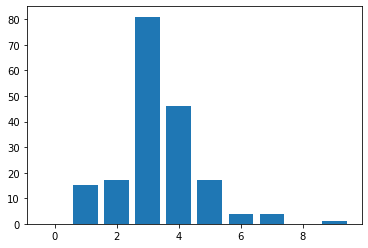

In [6]:
# get graph


graph = get_graph(DATASET)
G = nx.Graph(graph)    # assign your graph here
hist = nx.degree_histogram(G)

indices = [i for i, x in enumerate(hist)]

img = plt.bar(indices, hist)  # assign your plt.bar plot to img



# YOUR CODE HERE


In [7]:
#hidden tests for Question 1 are within this cell

### Q2. (3 points) Which node has the largest degree centrality and what is the value?

Hint: you can sort a dictionary `D` by its values using 

```python
sorted(D.items(), key=lambda item: item[1])
```

In [8]:
deg_dict = nx.degree_centrality(G)


all_values = deg_dict.values()
max_value = max(all_values)

node_max_degree = max(deg_dict, key=deg_dict.get)  # the node which has the largest degree centrality value
val_deg = max_value           # the centrality value of the node with the largest degree centrality

# YOUR CODE HERE


In [9]:
#hidden tests for Question 2 are within this cell

### Q3. (5 points) List the 5 nodes with the largest and smallest closeness centrality.

In [10]:
clos_dict = nx.closeness_centrality(G)

n = 5


max_5_cc = heapq.nlargest(n, clos_dict.items(), key=itemgetter(1))  # a list of 5 nodes with the largest closeness centrality values
min_5_cc = heapq.nsmallest(n, clos_dict.items(), key=itemgetter(1))  # a list of 5 nodes with the smallest closeness centrality values
# YOUR CODE HERE



max_5_cc = [a_tuple[0] for a_tuple in max_5_cc]
min_5_cc = [a_tuple[0] for a_tuple in min_5_cc]



In [11]:
max_5_cc

[117, 95, 15, 89, 134]

In [12]:
min_5_cc

[1, 81, 55, 66, 71]

In [13]:
#hidden tests for Question 3 are within this cell

### Q4. (5 points) List the 5 nodes with the largest and smallest betweenness centrality. 

In [14]:
bet_dict = nx.betweenness_centrality(G)

n = 5

max_5_bc = heapq.nlargest(n, bet_dict.items(), key=itemgetter(1))  # a list of 5 nodes with the largest betweenness centrality values
min_5_bc = heapq.nsmallest(n, bet_dict.items(), key=itemgetter(1))  # a list of 5 nodes with the smallest betweenness centrality values

# YOUR CODE HERE


max_5_bc = [a_tuple[0] for a_tuple in max_5_bc]
min_5_bc = [a_tuple[0] for a_tuple in min_5_bc]

In [15]:
max_5_bc

[117, 95, 154, 27, 87]

In [16]:
min_5_bc

[1, 81, 45, 29, 51]

In [17]:
#hidden tests for Question 4 are within this cell


### Q5. (5 points) What are the 3 nodes with the largest PageRank values in the graph?

Use damping coefficient $\alpha = 0.9$ and create a list of the three nodes with PageRank values in descending order. 

Check whether each pair of nodes among the top 3 nodes with the highest PageRank are connected by an edge. 

Hint: See [`Graph.has_edge`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.Graph.has_edge.html?highlight=has_edge#networkx.Graph.has_edge)

In [18]:
pagerank_dict = nx.pagerank(G, alpha=0.9)

n=3

result = heapq.nlargest(n, pagerank_dict.items(), key=itemgetter(1))  # list of the 3 nodes with the largest PageRank values in descending order

result = [a_tuple[0] for a_tuple in result]


has_edge12 = G.has_edge(result[0], result[1])  # boolean variable indicating whether 1st and 2nd nodes in `result` are connected
has_edge13 = G.has_edge(result[0], result[2])  # boolean variable indicating whether 1st and 3rd nodes in `result` are connected
has_edge23 = G.has_edge(result[1], result[2])  # boolean variable indicating whether 2nd and 3rd nodes in `result` are connected

# YOUR CODE HERE


In [19]:
#hidden tests for Question 5 - checking result - are within this cell

In [20]:
#hidden tests for Question 5 - checking edges - are within this cell

### Q6 (a). (5 points) List the 5 nodes with the largest hub scores and the 5 nodes with the largest authority scores. 

In [21]:

hub, authority = nx.hits(G, max_iter=200)

n = 5


h5 = heapq.nlargest(n, hub.items(), key=itemgetter(1))  # a list of the 5 nodes with the largest hub scores

h5 = [a_tuple[0] for a_tuple in h5]

a5 = heapq.nlargest(n, authority.items(), key=itemgetter(1))  # a list of the 5 nodes with the largest authority scores


a5 = [a_tuple[0] for a_tuple in a5]
# YOUR CODE HERE



In [22]:
#hidden tests for Question 6a are within this cell

### Q6 (b). (2 points) In part 6a, you should have found that nodes with the largest hub score are also the nodes with the largest authority score. In fact, the full ranking of nodes by hub score is the same as the ranking by authority score. This is interesting since we do not typically expect that the best hubs are also the best authorities, according to the HITS algorithm. Explain what features of this particular network make these rankings equal. 

The hub score for a given node will be high if that node points to lots of other nodes, while the authority score for a given node will be high if lots of other nodes point to it. When considering the student network, which contains relationships regarding collaboration between students, the fact that the nodes with the highest hub scores and the highest authority scores match is somewhat digestible. Nodes with high authority scores imply that the student(or node) is a valuable resource for other students, and is consulted often. The same nodes(students) likely have a high hub score because they often liason out to other students to offer their services.

### Q7. (5 points) Reflection: 
Did you notice any differences between the nodes with the highest scores across the different centrality measures? Is the amount of overlap between the lists of the top nodes expected? 

As aformentioned, I believe that the hub scores and authority scores matching are not out of the question, as the students offering assitance are also the onces that other students go to the most for assistance. In regards to closesness and betweenness, the first two items in the list for both centrality measures(largest and smallest) also match. This is not out of the question, as the nodes with the highest degree of closeness - in other words, the lowest average distance between all the other nodes in the network - also tend to show up in the shortest paths between any given nodes(betweenness).

### Q8. (3 points) What are the average clustering coefficient and graph transitivity of the network?

Transitivity and clustering coefficient are related to the tendency for a network to have triangles. However, they differ in that while clustering coefficient computes clustering on a node-by-node basis first and then averages over the nodes, transitivity computes the fraction of triplets that form a triangle over the entire network. 

In [23]:
graph_trans = nx.transitivity(G)     # graph transitivity
avg_clustering = nx.average_clustering(G)   # average clustering coefficient value

# YOUR CODE HERE


In [24]:
#hidden tests for Question 8 are within this cell


---
## Part 2. Node centrality and connected components

In this part, we are going to remove nodes from a graph and assess the effect that has on the number of connected components in the graph. Generally, removing nodes will tend to **increase** the number of connected components as the graph begins to fragment. However, not all nodes will have the same effect. Removing some highly central nodes is more likely to fragment the graph (and increase the number of connected components) than removing some nodes with low centrality. This is exactly what we want to demonstrate in this part. 

Starting with the entire graph, compute the number of connected components. Then remove 150 total nodes, one at a time. After each node removal, compute the number of connected components. 

We will compare 3 strategies for choosing which 150 nodes to remove: 

1. Remove randomly chosen nodes. 
2. Remove the node with the highest degree centrality in the current graph. 
3. Remove the node with the highest betweenness centrality in the current graph.

The goal is to test what strategy for node removal will fragment the graph faster. 

**<font color='red'>Note: </font>** 

1. We will use the **Facebook** network for this part.
2. Use the `random.choice` function for the random selection, and set the random seed to 0.
3. Do not use `np.random.choice`.


In [25]:
G = get_graph("facebook")

In [26]:
import copy
import random

### 9(a). (10 points) Let's begin with the first strategy: removing random nodes from the graph. 

Using the list `rand_move`, append the number of connected components after removing each of the 150 randomly chosen nodes. 

Please use the function `random.choice` 150 times to select each node (instead of using it just once to select all 150 nodes).



In [33]:
%%time

random.seed(0)         # use a fixed random seed for autograder
G1 = copy.deepcopy(G)  # operate on a copy of the original graph, because node removal is irreversible
rand_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components 



for i in range(1, 151):
    random_node = random.choice(list(G1.nodes()))
    G1.remove_node(random_node)   
    rand_move.append(nx.number_connected_components(G1))


# YOUR CODE HERE


CPU times: user 52.1 ms, sys: 3.96 ms, total: 56.1 ms
Wall time: 54.6 ms


In [28]:
#hidden tests for Question 9a are within this cell

###  9(b). (10 points) Now let's change the strategy to choosing the nodes with the highest degree centrality. 

Using the list `deg_move`, append the number of connected components after removing each of the 150 nodes. At each step, remove the node with the **currently** highest degree centrality. If multiple nodes have the same centrality values, remove the node which has the **largest node number**. Note that you must recompute the degree centrality of the nodes after removing each node since node removal impacts centrality. 

**Hint**:

To sort by multiply keys, you can use the Python `sorted` function with a specified tuple of keys. 

For example, to sort a sequence of pairs `arr = [(x1, y1), (x2, y2), ...(xn, yn)]` first by `x` then by `y`, the `key` is speficied as the following:

```python
sorted(arr, key=lambda pair: (pair[0], pair[1]))
```

In [34]:
%%time

G1 = copy.deepcopy(G)
deg_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components





for i in range(1, 151):
    deg_dict = nx.degree_centrality(G1)
    all_values = deg_dict.values()
    max_value = max(all_values)    
    key_list = [k for k, v in deg_dict.items() if v == max_value]   
    node_max_degree = max(key_list)
    G1.remove_node(node_max_degree) 
    deg_move.append(nx.number_connected_components(G1))

# YOUR CODE HERE


CPU times: user 67.2 ms, sys: 0 ns, total: 67.2 ms
Wall time: 65.9 ms


In [30]:
#hidden tests for Question 9b are within this cell

###  9(c). (10 points) Finally, let's adopt the strategy of choosing the nodes with the highest betweenness centrality. 

Using the list `bet_move`, append the number of connected components after removing each of the 150 nodes. At each step, remove the node with the **currently** highest betweenness centrality. If multiple nodes have the same centrality values, remove the node which has the **largest node number**. Note that you must recompute the betweenness centrality of the nodes after removing each node since node removal impacts centrality. 

In [35]:
%%time

G1 = copy.deepcopy(G)
bet_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components

# YOUR CODE HERE

for i in range(1, 151):
    bet_dict = nx.betweenness_centrality(G1)
    all_values = bet_dict.values()
    max_value = max(all_values)    
    key_list = [k for k, v in bet_dict.items() if v == max_value]   
    node_max_degree = max(key_list)
    G1.remove_node(node_max_degree) 
    bet_move.append(nx.number_connected_components(G1))

CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 18.3 s


In [32]:
#hidden tests for Question 9c are within this cell

### 9(d). (2 points) Plot the results.

Now that you have the lists `rand_move`, `deg_move`, and `bet_move`, make a single plot that shows the number of removed nodes on the x-axis and the number of connected components on the y-axis. The plot should include three curves -- one for each node removal strategy. 

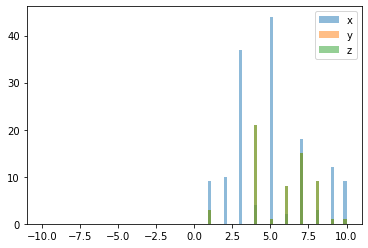

In [37]:
# YOUR CODE HERE
from matplotlib import pyplot
import numpy as np
x = rand_move
y = deg_move
z = bet_move

bins = np.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.hist(y, bins, alpha=0.5, label='z')
pyplot.legend(loc='upper right')
pyplot.show()

### Q9(e). (15 points) Which node removal strategy made the number of connected components increase the fastest? The slowest? Explain your results. 

YOUR ANSWER HERE
I timed the preceeding three cells in order to ascertain the time difference between the three cells with greater accuracy. Randomly removing nodes regardless of centrality measure boasted the fastest execution time(56.1 ms), choosing a node based on the highest degree centrality had the second fastest execution time(67.2 ms), while choosing a node based on the higest betweenness centrality was markedly slower(18.3 s). These results are understandable. Betweenness centrality, in general, is a slow calculation(finding the shortest path through the network), and the algorithm utilized by networkx has a time complexity of O(VE), where V is the number of vertices and E is the number of edges. With a network of substantial size, this time complexity can cause the computation time to become incredibly unwieldy. 

Unsurprisingly, the method that took the least amount of time was randomly choosing a node, without any additional computations involved. 

---

## Part 3. Prediction (18 points)

In this part, you are going to complete a supervised prediction task on the **Facebook** network. The task is to predict whether a node is labeled as an "influential" user. You will be given the following two files:

1. `facebook_train.csv`, which contains the training set.
2. `facebook_test.csv`, which contains the test set. 

The training set file provides a label for each node, with `True` indicating the node is "influential" and `False` otherwise. The test set file also has a column `label`，but the values are left as `None` for you to predict. However, the autograder will use another version of the test set file where the `label` column contains values to score your predictions.

Use any node attributes (such as the ones we explored in part 1) as features for this prediction and return the result as a dictionary of `<node, label>`, where `node` is a node that appears in the test set file.


---

**<font color='red'>Note:</font>**
1. Use sklearn [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model as your supervised model.
2. Use F1 score (`sklearn.metrics.f1_score`) to evaluate your prediction.
3. In order to receive full credit, your prediction results must achieve an F1 score higher than or equal to 0.85.


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [64]:
predict_labels = dict()  # Your prediction result as a dictionary where 
                        # <key> is a node in the test set and <value> is the predicted label

# YOUR CODE HERE

graph = get_graph('facebook')
G = nx.Graph(graph)


clf = RandomForestClassifier(n_estimators=100)
# clf.fit()

train_df = pd.read_csv('assets/facebook_train.csv')
test_df = pd.read_csv('assets/facebook_test.csv')


clos_dict = nx.closeness_centrality(G)
deg_dict = nx.degree_centrality(G)

train_df['deg_centrality'] = train_df['node'].map(deg_dict)
train_df['closeness_centrality'] = train_df['node'].map(clos_dict)

test_df['deg_centrality'] = test_df['node'].map(deg_dict)
test_df['closeness_centrality'] = test_df['node'].map(clos_dict)


y_train = train_df['label']
y_test = test_df['label']

X_train = train_df
X_test = test_df

X_train = X_train.drop(columns = ['label'])
X_test = X_test.drop(columns = ['label'])


clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

predict_labels = dict(zip(X_test['node'], y_pred))


In [ ]:
#hidden tests for Part 3 are within this cell

# End